<a href="https://colab.research.google.com/github/Stasvdovin/mlops_practice/blob/master/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание датасетов

Датасет 1

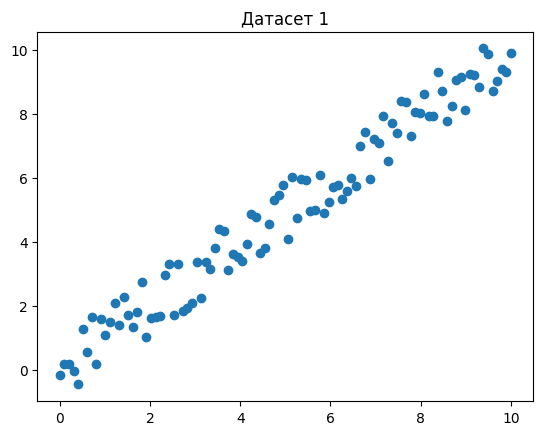

In [2]:
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100)*2 - 1

plt.scatter(xs1, ys1)
plt.title("Датасет 1")
plt.show()

Обучаем модель линейной регрессии и смотрим метрики

Mean squared error: 0.35
R-squared (R2) Score: 0.96


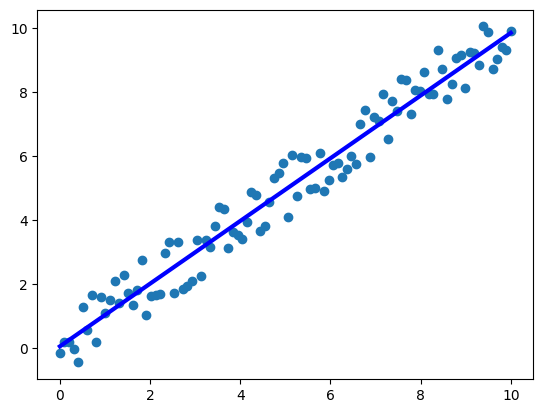

In [3]:
model = LinearRegression()
model.fit(xs1.reshape(-1, 1), ys1)
approx = model.predict(xs1.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys1, approx))
print('R-squared (R2) Score: %.2f' % r2_score(ys1, approx))

plt.scatter(xs1, ys1)
plt.plot(xs1.reshape(-1,1), approx, color='blue', linewidth=3)
plt.show()
np.savetxt('ys1.csv', ys1, delimiter = ',')
np.savetxt('approx.csv', approx, delimiter = ',')

Датасет 2

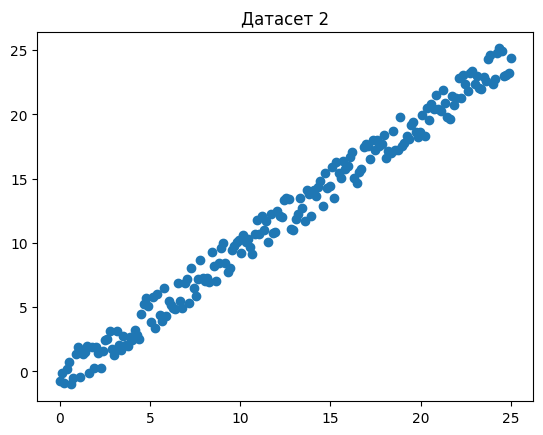

In [4]:

xs2 = np.linspace(0, 25, 200)
ys2 = xs2 + np.random.random(200)*3 - 2

plt.scatter(xs2, ys2)
plt.title("Датасет 2")
plt.show()

Смотрим на метрики как отрабатывают новые данные 

Mean squared error: 0.91
R-squared (R2) Score: 0.98


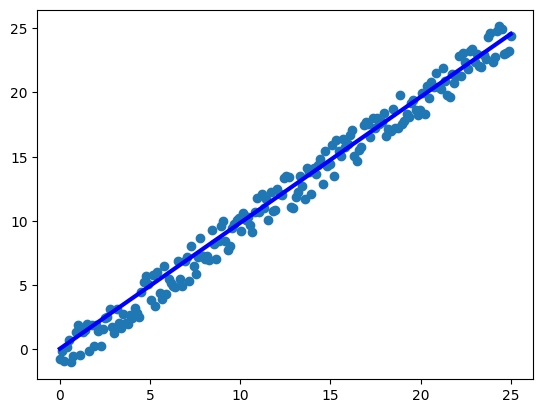

In [5]:

approx2 = model.predict(xs2.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys2, approx2))
print('R-squared (R2) Score: %.2f' % r2_score(ys2, approx2))

plt.scatter(xs2, ys2)
plt.plot(xs2.reshape(-1,1), approx2, color='blue', linewidth=3)
plt.show()
np.savetxt('ys2.csv', ys2, delimiter = ',')
np.savetxt('approx2.csv', approx2, delimiter = ',')

Датасет 3

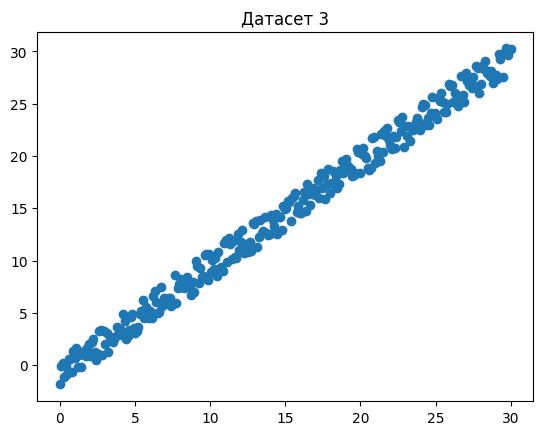

In [6]:

xs3 = np.linspace(0, 30, 300)
ys3 = xs3 + np.random.random(300)*3 - 2

plt.scatter(xs3, ys3)
plt.title("Датасет 3")
plt.show()

Смотрим на метрики как отрабатывают новые данные

Mean squared error: 0.92
R-squared (R2) Score: 0.99


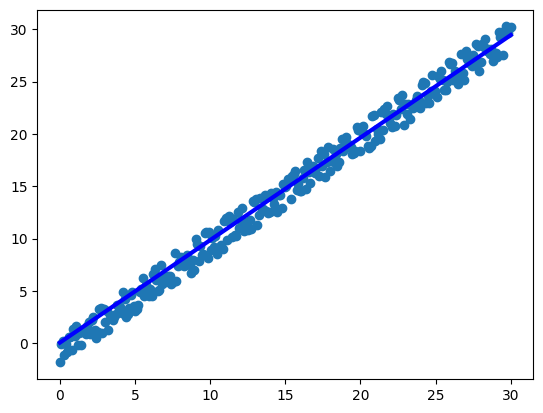

In [7]:
approx3 = model.predict(xs3.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys3, approx3))
print('R-squared (R2) Score: %.2f' % r2_score(ys3, approx3))

plt.scatter(xs3, ys3)
plt.plot(xs3.reshape(-1,1), approx3, color='blue', linewidth=3)
plt.show()
np.savetxt('ys3.csv', ys3, delimiter = ',')
np.savetxt('approx3.csv', approx3, delimiter = ',')

Датасет с шумом в данных

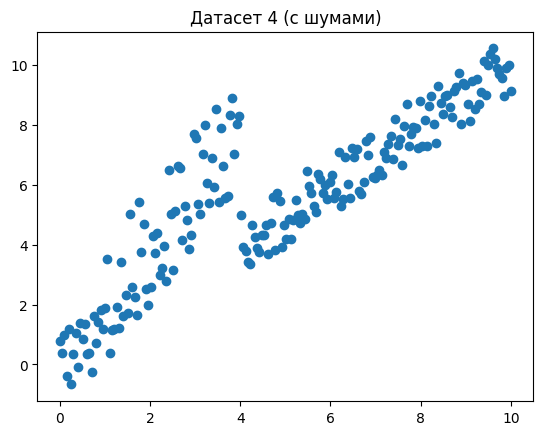

In [8]:

xs4 = np.linspace(0, 10, 200)
ys4 = xs4 + np.random.random(200)*2 - 1
ys4[20:80] *= 2

plt.scatter(xs4, ys4)
plt.title("Датасет 4 (с шумами)")
plt.show()

Смотрим на метрики как отрабатывают новые данные

Mean squared error: 2.36
R-squared (R2) Score: 0.68


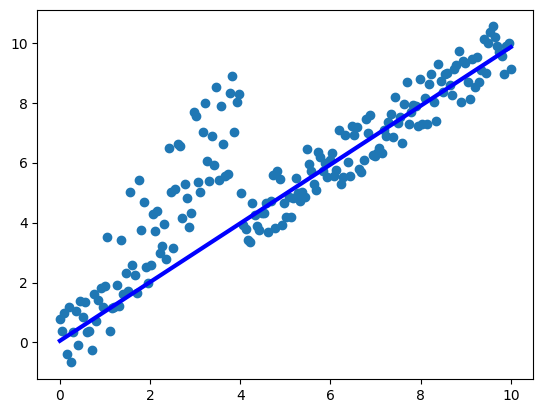

In [9]:
approx4 = model.predict(xs4.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys4, approx4))
print('R-squared (R2) Score: %.2f' % r2_score(ys4, approx4))

plt.scatter(xs4, ys4)
plt.plot(xs4.reshape(-1,1), approx4, color='blue', linewidth=3)
plt.show()
np.savetxt('ys4.csv', ys4, delimiter = ',')
np.savetxt('approx4.csv', approx4, delimiter = ',')

# Pytest 

Проверяем Датасет 1

In [10]:
%%writefile test_score1.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys1():
    ys1 = np.loadtxt('ys1.csv', delimiter=',')
    return(ys1)
@pytest.fixture()
def load_approx():
    approx = np.loadtxt('approx.csv', delimiter=',')
    return(approx)
def test_mse(load_ys1, load_approx):
    assert mean_squared_error(load_ys1, load_approx) < 2
def test_r2(load_ys1, load_approx):
    assert r2_score(load_ys1, load_approx) > 0.8

Writing test_score1.py


In [11]:
!pytest -v test_score1.py

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score1.py::test_mse PASSED                                          [ 50%]
test_score1.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.45s ===============================


Тест отработал без ошибок 

Проверяем Датасет 2

In [12]:
%%writefile test_score2.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys2():
    ys2 = np.loadtxt('ys2.csv', delimiter=',')
    return(ys2)
@pytest.fixture()
def load_approx2():
    approx2 = np.loadtxt('approx2.csv', delimiter=',')
    return(approx2)
def test_mse(load_ys2, load_approx2):
    assert mean_squared_error(load_ys2, load_approx2) < 2
def test_r2(load_ys2, load_approx2):
    assert r2_score(load_ys2, load_approx2) > 0.8

Writing test_score2.py


In [14]:
!pytest -v test_score2.py

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score2.py::test_mse PASSED                                          [ 50%]
test_score2.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.46s ===============================


Без ошибок

Проверяем Датасет 3

In [15]:
%%writefile test_score3.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys3():
    ys3 = np.loadtxt('ys3.csv', delimiter=',')
    return(ys3)
@pytest.fixture()
def load_approx3():
    approx3 = np.loadtxt('approx3.csv', delimiter=',')
    return(approx3)
def test_mse(load_ys3, load_approx3):
    assert mean_squared_error(load_ys3, load_approx3) < 2
def test_r2(load_ys3, load_approx3):
    assert r2_score(load_ys3, load_approx3) > 0.8

Writing test_score3.py


In [16]:
!pytest -v test_score3.py

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score3.py::test_mse PASSED                                          [ 50%]
test_score3.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.46s ===============================


Тоже отработал без ошибок 

Проверяем Датасет 4

In [17]:
%%writefile test_score4.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys3():
    ys4 = np.loadtxt('ys4.csv', delimiter=',')
    return(ys4)
@pytest.fixture()
def load_approx4():
    approx4 = np.loadtxt('approx4.csv', delimiter=',')
    return(approx4)
def test_mse(load_ys4, load_approx4):
    assert mean_squared_error(load_ys4, load_approx4) < 2
def test_r2(load_ys4, load_approx4):
    assert r2_score(load_ys4, load_approx4) > 0.8

Writing test_score4.py


In [18]:
!pytest -v test_score4.py

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score4.py::test_mse ERROR                                           [ 50%]
test_score4.py::test_r2 ERROR                                            [100%]

==================================== ERRORS ====================================
__________________________ ERROR at setup of test_mse __________________________
file /content/test_score4.py, line 12
  def test_mse(load_ys4, load_approx4):
E       fixture 'load_ys4' not found
>       available fixtures: anyio_backend, anyio_backend_name, anyio_backend_options, cache, capfd, capfdbinary, caplog, capsys, capsysbinary, doctest_namespace, load_approx4, load_ys3, monkeypatch, pytestconfig, record_property, record_testsuite_property,

Тест отработал с ошибками по метрикам 

Из за выбросах в данных в интервале от 20 до 80 модель которая обученная на 1 датасете не учитывает эти данные. Качество метрик ухуджается. Нужно переобучать новую модель для этих данных. 